### QUORA QUESTION PAIRS

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
from IPython.display import display
pd.set_option('display.max_colwidth',-1)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pal = sns.color_palette() 

##### REMOVING ABBREVIATIONS

In [2]:
punctuation='["\'?,\.]' # will replace all these punctuation with ''
abbr_dict={
    "what's":"what is",   # creating a dictionary
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    punctuation:'',          # punctuation already defined above
    '\s+':' ',               # replace multi space with one single space
}

In [3]:
def process_data(file_name):                  #creating a function to convert question into lower case and into string
    data=pd.read_csv(file_name)
    data.question1=data.question1.str.lower() # converting to lower case
    data.question2=data.question2.str.lower()
    data.question1=data.question1.astype(str)
    data.question2=data.question2.astype(str)
    data.replace(abbr_dict,regex=True,inplace=True)
    display(data.head(2))
    return data
df_train=process_data('train.csv')  # calling process_data function

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0
1,1,3,4,what is the story of kohinoor (koh-i-noor) diamond,what would happen if the indian government stole the kohinoor (koh-i-noor) diamond back,0


### Plotting a graph of Number of Occurence of Question vs Number of Question

Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780
Total number of question pairs for training: 404290
Duplicate pairs: 36.92%



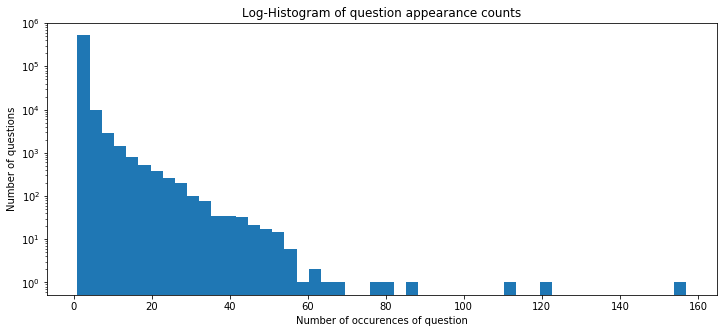

In [4]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len( np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')                  # removing values below Y-axis as Log(0) is undefined
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [5]:
from sklearn.metrics import log_loss
p = df_train['is_duplicate'].mean() # Our predicted probability
print('Predicted score:', log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))
df_test = pd.read_csv('test.csv')
sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})
sub.to_csv('naive_submission.csv', index=False)
sub.head()

Predicted score: 0.658527383984


,is_duplicate,test_id
0,0.369198,0
1,0.369198,1
2,0.369198,2
3,0.369198,3
4,0.369198,4


In [6]:
df_test = pd.read_csv('test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1,1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?
2,2,What but is the best way to send money from China to the US?,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [7]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


### Plotting graph of number of characters against the calculated probability

mean-train 58.53 std-train 31.56 mean-test 60.07 std-test 31.62 max-train 1140.00 max-test 1176.00


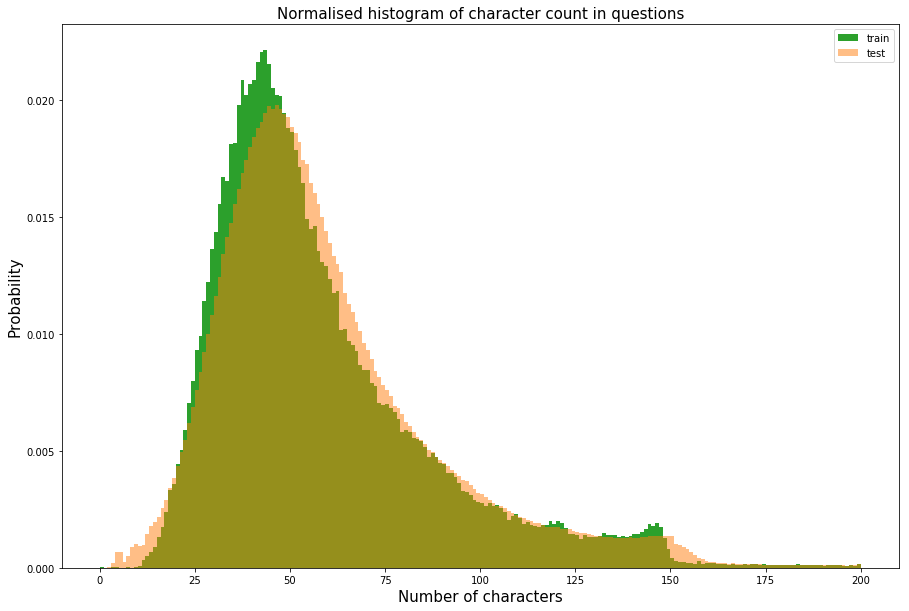

In [8]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

### Plotting a graph of word counts in a question against the probability

mean-train 11.12 std-train 5.95 mean-test 11.02 std-test 5.84 max-train 248.00 max-test 238.00


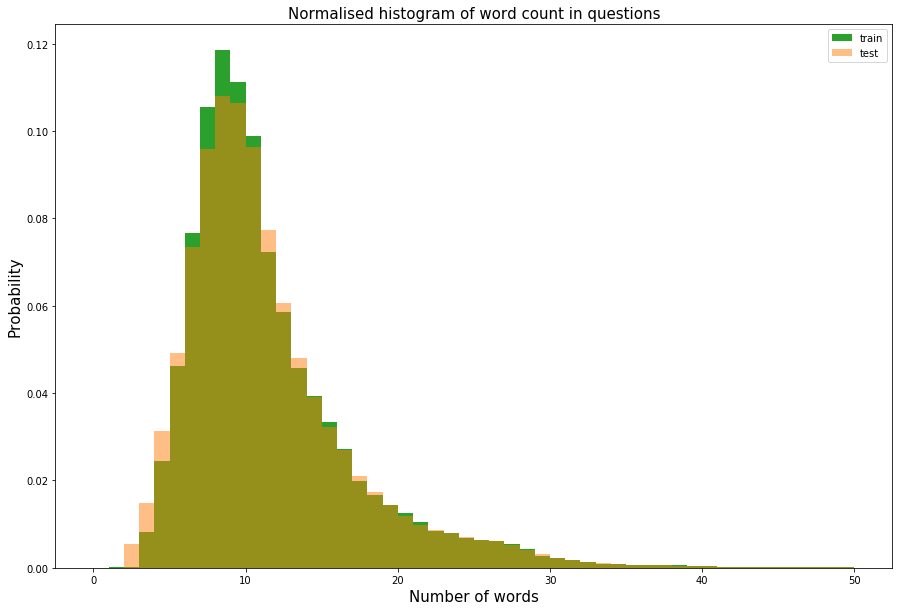

In [9]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [10]:
##nltk.download('all')

Text(0,0.5,'Normalised_Count')

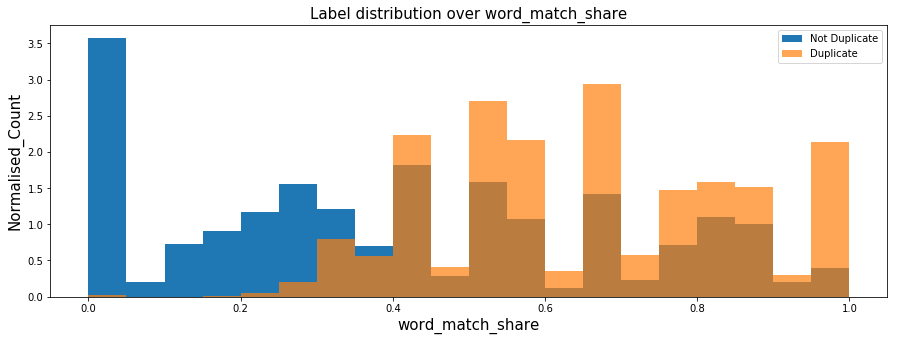

In [11]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):           # defining a funtion to check how many words match in both question in training set
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)
plt.ylabel('Normalised_Count', fontsize=15)

#### TF-IDF

In [12]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

print('Most common words and weights: \n')           
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])     # returns key, value pairs
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5827980484377947e-06), ('what', 2.99644322189561e-06), ('is', 3.367740414568845e-06), ('i', 4.320176954448054e-06), ('how', 4.339110135293454e-06), ('a', 4.5315714583503264e-06), ('to', 4.6440131704213515e-06), ('in', 4.8556889251447e-06), ('do', 5.589496218705808e-06), ('of', 5.892821365013141e-06)]

Least common words and weights: 


[('シ', 9.998000399920016e-05),
 ('し', 9.998000399920016e-05),
 ('dcx3400', 9.998000399920016e-05),
 ('(employment', 9.998000399920016e-05),
 ('1-855-425-3768', 9.998000399920016e-05),
 ('confederates', 9.998000399920016e-05),
 ('asahi', 9.998000399920016e-05),
 ('fab', 9.998000399920016e-05),
 ('oitnb', 9.998000399920016e-05),
 ('samrudi', 9.998000399920016e-05)]

In [13]:
def tfidf_word_match_share(row):            # defining a function to check word_share
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


Text(0,0.5,'Normalised_Count')

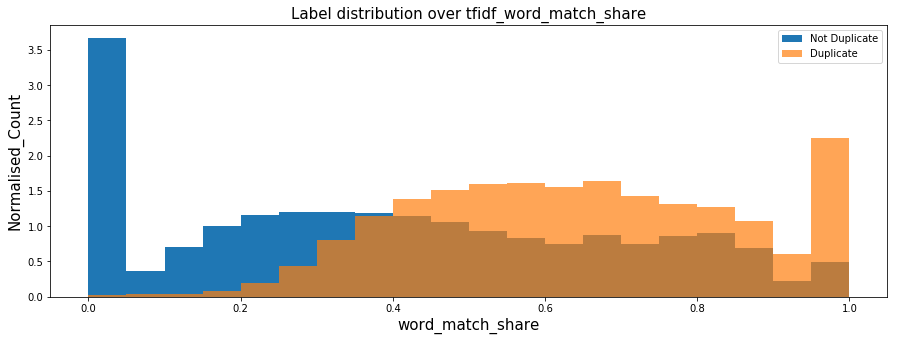

In [14]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)
plt.ylabel('Normalised_Count', fontsize=15)

In [15]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.750895525392
   TFIDF AUC: 0.73922901252


In [16]:
# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [17]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

0.19124366100096607


In [18]:
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### XGBoost

In [19]:
import xgboost as xgb  # Download by typing the command conda install -c anaconda py-xgboost for windows

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.683804	valid-logloss:0.683857
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.607751	valid-logloss:0.608276
[20]	train-logloss:0.554456	valid-logloss:0.555366
[30]	train-logloss:0.515667	valid-logloss:0.5169
[40]	train-logloss:0.486974	valid-logloss:0.488467
[50]	train-logloss:0.465386	valid-logloss:0.467076
[60]	train-logloss:0.448995	valid-logloss:0.450855
[70]	train-logloss:0.43645	valid-logloss:0.438454
[80]	train-logloss:0.426761	valid-logloss:0.428887
[90]	train-logloss:0.41922	valid-logloss:0.421448
[100]	train-logloss:0.413329	valid-logloss:0.415645
[110]	train-logloss:0.408713	valid-logloss:0.411108
[120]	train-logloss:0.4051	valid-logloss:0.407552
[130]	train-logloss:0.402251	valid-logloss:0.404754
[140]	train-logloss:0.399959	valid-logloss:0.402506
[150]	train-logloss:0.398185	valid-logloss:0.400772
[160]	train-logloss:0.39678	valid-

In [20]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('simple_xgb.csv', index=False)

The text in the document by <Shireen Rabbani, Rohit Ulhe> is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/
The code in the document by <Shireen Rabbani, Rohit Ulhe> is licensed under the MIT License https://opensource.org/licenses/MIT